In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()
#

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [19]:
print(digits.target_names)
print(digits.target.shape)
print(digits.data.shape)

[0 1 2 3 4 5 6 7 8 9]
(1797,)
(1797, 64)


In [131]:
print(digits.images[0])#images and data have same content.

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


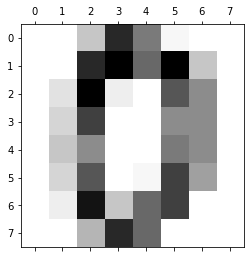

In [132]:
import matplotlib.pyplot as plt
plt.matshow(digits.images[0],cmap=plt.cm.Greys)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [15]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target)

In [13]:
X_train.shape

(1347, 64)

In [14]:
1347/1797 # the splitting ratio is approx 75%,25% by defalut for training and testing 

0.7495826377295493

In [16]:
gaussian=GaussianNB()
gaussian.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [17]:
y_predict=gaussian.predict(X_test)

In [18]:
gaussian.score(X_test,y_test)

0.8288888888888889

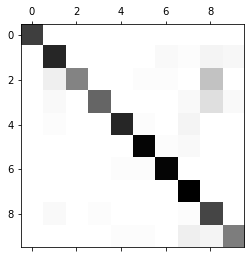

In [37]:
from sklearn.metrics import confusion_matrix
plt.matshow(confusion_matrix(y_test, y_predict),cmap=plt.cm.Greys)
#matrix values plotted as colours ,higher the value darker the colour .

In [79]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=12,criterion="gini")
model = model.fit(X_train, y_train)

In [80]:
y_predict=model.predict(X_test)

In [83]:
model.score(X_test,y_test)
#for default classifier the accuracy was 83 %
#for max_depth = 10 it becomes 84 % ,improved because a kind of regularization
#and peaks for max_depth of 12 with score of around 85.5 % 

0.8622222222222222

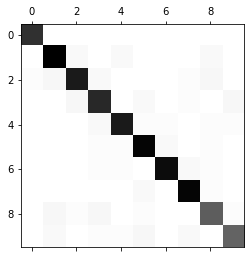

In [84]:
plt.matshow(confusion_matrix(y_test, y_predict),cmap=plt.cm.Greys)

In [124]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=15)
model = model.fit(X_train, y_train)

In [125]:
y_predict=model.predict(X_test)

In [126]:
model.score(X_test,y_test)

0.9466666666666667

In [136]:
from sklearn import svm
model = svm.SVC(C=1000)# C bears an inverse relation to lambda ,the term that we use for penalty . 
model.fit(X_train, y_train)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [137]:
y_predict=model.predict(X_test)

In [138]:
model.score(X_test,y_test)

0.9911111111111112

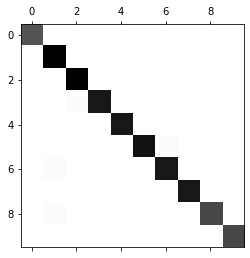

In [139]:
plt.matshow(confusion_matrix(y_test, y_predict),cmap=plt.cm.Greys)

In [142]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100,75,60,50,40,30,20,10),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',verbose='true')
#verbose is set true to print progress 

In [143]:
model.fit(X_train,y_train)

Iteration 1, loss = 2.45378344
Iteration 2, loss = 2.20315689
Iteration 3, loss = 1.98813206
Iteration 4, loss = 1.74687325
Iteration 5, loss = 1.52961576
Iteration 6, loss = 1.26897121
Iteration 7, loss = 1.00644809
Iteration 8, loss = 0.75247024
Iteration 9, loss = 0.57034401
Iteration 10, loss = 0.42228321
Iteration 11, loss = 0.30523247
Iteration 12, loss = 0.22617505
Iteration 13, loss = 0.19527258
Iteration 14, loss = 0.15700989
Iteration 15, loss = 0.12411686
Iteration 16, loss = 0.10510774
Iteration 17, loss = 0.09326049
Iteration 18, loss = 0.07357775
Iteration 19, loss = 0.05610833
Iteration 20, loss = 0.04588050
Iteration 21, loss = 0.03916270
Iteration 22, loss = 0.03438640
Iteration 23, loss = 0.02742548
Iteration 24, loss = 0.02621238
Iteration 25, loss = 0.02109085
Iteration 26, loss = 0.01752059
Iteration 27, loss = 0.01607457
Iteration 28, loss = 0.01480371
Iteration 29, loss = 0.01325131
Iteration 30, loss = 0.01150669
Iteration 31, loss = 0.01009952
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 75, 60, 50, 40, 30, 20, 10),
              learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5, random_state=None,
              shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
              verbose='true', warm_start=False)

In [144]:
y_predict=model.predict(X_test)

In [145]:
model.score(X_test,y_test)

0.9622222222222222

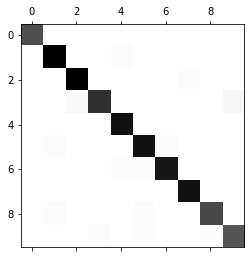

In [146]:
plt.matshow(confusion_matrix(y_test, y_predict),cmap=plt.cm.Greys)